<a href="https://colab.research.google.com/github/AbramyantsAnastasia/Labs/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install mlxtend matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import statsmodels as stm
import scipy
import pandas_datareader
import yfinance
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sbn
import researchpy as rp
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Titanic.csv")
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Sex       2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB
None


,Class,Sex,Age,Survived
count,2201,2201,2201,2201
unique,4,2,2,2
top,Crew,Male,Adult,No
freq,885,1731,2092,1490


In [ ]:
#Сколько уникальных значений содержится в переменной "Class"?
df['Class'].unique()

array(['3rd', '1st', '2nd', 'Crew'], dtype=object)

In [ ]:
#Данные необходимо преобразовать в формат двоичных значений для каждой категории. Для этого используется алгоритм One Hot Encoding (ohe): 
ohe_df = pd.get_dummies(df)
ohe_df

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Sex_Female,Sex_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2196,0,0,0,1,1,0,1,0,0,1
2197,0,0,0,1,1,0,1,0,0,1
2198,0,0,0,1,1,0,1,0,0,1
2199,0,0,0,1,1,0,1,0,0,1


In [ ]:
pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.9 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
#Сформируем правила. 
rules = apriori(ohe_df, use_colnames=True, min_support=0.005)
rules.head()

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Sex_Female)


In [ ]:
#Добавим переменную, которая содержит длину каждого правила:
rules_len = rules['itemsets'].apply(lambda x: len(x))

In [ ]:
#можно вывести правила с заданными значениями:
rules[ (rules_len >= 2) & (rules['support'] >= 0.8)]
#в данном случае опора пусть будет не ниже 0.1, однако правила длиной 1 нас не интересуют
rules_all = rules[rules_len >= 2]

In [ ]:
#сгенерируем правила ассоциации
rules_list = association_rules(rules, metric="confidence", min_threshold=0.8)

In [ ]:
#Полный список правил ассоциации достаточно обширный.
rules_list

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
1,(Class_2nd),(Age_Adult),0.129487,0.950477,0.118582,0.915789,0.963505,-0.004492,0.588085
2,(Class_3rd),(Age_Adult),0.320763,0.950477,0.284871,0.888102,0.934375,-0.020008,0.442572
3,(Class_Crew),(Sex_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621
4,(Class_Crew),(Age_Adult),0.402090,0.950477,0.402090,1.000000,1.052103,0.019913,inf
...,...,...,...,...,...,...,...,...,...
75,"(Age_Adult, Survived_No, Class_Crew)",(Sex_Male),0.305770,0.786461,0.304407,0.995542,1.265851,0.063931,47.903983
76,"(Survived_No, Class_Crew)","(Sex_Male, Age_Adult)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079
77,"(Survived_Yes, Sex_Male, Class_Crew)",(Age_Adult),0.087233,0.950477,0.087233,1.000000,1.052103,0.004320,inf
78,"(Survived_Yes, Age_Adult, Class_Crew)",(Sex_Male),0.096320,0.786461,0.087233,0.905660,1.151565,0.011481,2.263517


In [ ]:
#Выведем только правила, характеризующие выживаемость
rules_list[ (rules_list['consequents'] == {'Survived_No'}) | (rules_list['consequents'] == {'Survived_Yes'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,"(Class_1st, Sex_Female)",(Survived_Yes),0.065879,0.323035,0.064062,0.972414,3.010243,0.042781,24.539982
17,"(Class_2nd, Sex_Female)",(Survived_Yes),0.048160,0.323035,0.042254,0.877358,2.715986,0.026696,5.519869
19,"(Sex_Male, Class_2nd)",(Survived_No),0.081327,0.676965,0.069968,0.860335,1.270871,0.014913,2.312930
22,"(Age_Child, Class_2nd)",(Survived_Yes),0.010904,0.323035,0.010904,1.000000,3.095640,0.007382,inf
26,"(Sex_Male, Class_3rd)",(Survived_No),0.231713,0.676965,0.191731,0.827451,1.222295,0.034870,1.872135
31,"(Sex_Female, Class_Crew)",(Survived_Yes),0.010450,0.323035,0.009087,0.869565,2.691861,0.005711,5.190065
46,"(Class_1st, Age_Adult, Sex_Female)",(Survived_Yes),0.065425,0.323035,0.063607,0.972222,3.009650,0.042473,24.370741
55,"(Class_2nd, Age_Adult, Sex_Female)",(Survived_Yes),0.042254,0.323035,0.036347,0.860215,2.662916,0.022698,4.842904
56,"(Age_Child, Class_2nd, Sex_Female)",(Survived_Yes),0.005906,0.323035,0.005906,1.000000,3.095640,0.003998,inf
57,"(Age_Adult, Sex_Male, Class_2nd)",(Survived_No),0.076329,0.676965,0.069968,0.916667,1.354083,0.018296,3.876420


In [ ]:
#Выведем правила, характеризующие только выживших
rules_list[ (rules_list['consequents'] == {'Survived_Yes'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,"(Class_1st, Sex_Female)",(Survived_Yes),0.065879,0.323035,0.064062,0.972414,3.010243,0.042781,24.539982
17,"(Class_2nd, Sex_Female)",(Survived_Yes),0.048160,0.323035,0.042254,0.877358,2.715986,0.026696,5.519869
22,"(Age_Child, Class_2nd)",(Survived_Yes),0.010904,0.323035,0.010904,1.000000,3.095640,0.007382,inf
31,"(Sex_Female, Class_Crew)",(Survived_Yes),0.010450,0.323035,0.009087,0.869565,2.691861,0.005711,5.190065
46,"(Class_1st, Age_Adult, Sex_Female)",(Survived_Yes),0.065425,0.323035,0.063607,0.972222,3.009650,0.042473,24.370741
55,"(Class_2nd, Age_Adult, Sex_Female)",(Survived_Yes),0.042254,0.323035,0.036347,0.860215,2.662916,0.022698,4.842904
56,"(Age_Child, Class_2nd, Sex_Female)",(Survived_Yes),0.005906,0.323035,0.005906,1.000000,3.095640,0.003998,inf
72,"(Age_Adult, Sex_Female, Class_Crew)",(Survived_Yes),0.010450,0.323035,0.009087,0.869565,2.691861,0.005711,5.190065


In [ ]:
# Задание 2. Выведите правила ассоциации, характеризующие пассажиров 2 класса из левого списка (antecedents)

rules = apriori(ohe_df, min_support=0.005, use_colnames=True)
rules_list = association_rules(rules, metric="confidence", min_threshold=0.8)

antecedents = {'Class_2nd'}  # Левый список antecedents

rules_filtered = rules_list[rules_list['antecedents'] == antecedents]
print(rules_filtered)

   antecedents  consequents  antecedent support  consequent support   support  \
1  (Class_2nd)  (Age_Adult)            0.129487            0.950477  0.118582   

   confidence      lift  leverage  conviction  
1    0.915789  0.963505 -0.004492    0.588085  


In [ ]:
# Задание 3.  Выведите правила, характеризующие выживших, длиной более 2, и отсортируйте их по убыванию критерия интересности (lift).Сколько всего закономерностей вы получили?
list_survived = rules_list[ (rules_list['consequents'] == {'Survived_Yes'}) & (rules_list['antecedents'].apply(lambda x: len(x) > 2))].sort_values(by='lift', ascending=False)

print("Количество закономерностей:", len(list_survived))
print("Несколько ассоциативных правил с исследовательским интересом:")
print(list_survived.head(5))
print("Несколько ассоциативных правил без содержательного смысла:")
print(list_survived.tail(3))

Количество закономерностей: 4
Несколько ассоциативных правил с исследовательским интересом:
                            antecedents     consequents  antecedent support  \
56   (Age_Child, Class_2nd, Sex_Female)  (Survived_Yes)            0.005906   
46   (Class_1st, Age_Adult, Sex_Female)  (Survived_Yes)            0.065425   
72  (Age_Adult, Sex_Female, Class_Crew)  (Survived_Yes)            0.010450   
55   (Class_2nd, Age_Adult, Sex_Female)  (Survived_Yes)            0.042254   

    consequent support   support  confidence      lift  leverage  conviction  
56            0.323035  0.005906    1.000000  3.095640  0.003998         inf  
46            0.323035  0.063607    0.972222  3.009650  0.042473   24.370741  
72            0.323035  0.009087    0.869565  2.691861  0.005711    5.190065  
55            0.323035  0.036347    0.860215  2.662916  0.022698    4.842904  
Несколько ассоциативных правил без содержательного смысла:
                            antecedents     consequents  a

In [ ]:
#В этом коде мы фильтруем правила по следующим условиям:
# rules_list['consequents'] == {'Survived_Yes'} - правила, в которых Survived_Yes является последствием.
# rules_list['antecedents'].apply(lambda x: len(x) > 2) - правила с длиной антецедента больше 2.
#Затем мы сортируем результаты по убыванию критерия интересности (lift).
#Выводится количество закономерностей, а затем приводятся несколько ассоциативных правил с исследовательским интересом и без содержательного смысла.
#Обратите внимание, что для вывода правил list_survived.head(5) и list_survived.tail(3) используются методы .head() и .tail(), чтобы вывести первые 5 правил и последние 3 правила соответственно.

In [ ]:
# Задание4.
rules_survived = apriori(ohe_df, use_colnames=True, min_support=0.002)
list_survived = association_rules(rules_survived, metric="confidence", min_threshold=0.2)
#Вычислим длину каждого правила по левой стороне
survived_len = list_survived['antecedents'].apply(lambda x: len(x))
#Выведем только правила для выживших и с длиной левой стороны большей 2
list_survived[ (list_survived['consequents'] == {'Survived_Yes'}) & (survived_len >= 2)]

# Выживаемость детей 1 класса и 2 класса:
# Дети из 1 класса
children_class1 = list_survived[(list_survived['antecedents'] == {'Child', '1st'}) & (list_survived['consequents'] == {'Survived_Yes'})]

# Дети из 2 класса
children_class2 = list_survived[(list_survived['antecedents'] == {'Child', '2nd'}) & (list_survived['consequents'] == {'Survived_Yes'})]

# Процент выживших детей из 1 класса
percent_children_class1 = len(children_class1) / len(df[(df['Class'] == '1st') & (df['Age'] == 'Child')]) * 100

# Процент выживших детей из 2 класса
percent_children_class2 = len(children_class2) / len(df[(df['Class'] == '2nd') & (df['Age'] == 'Child')]) * 100

# Процент выживших взрослых из 2 класса
percent_adults_class2 = len(list_survived[(list_survived['antecedents'] == {'Adult', '2nd'}) & (list_survived['consequents'] == {'Survived_Yes'})]) / len(df[(df['Class'] == '2nd') & (df['Age'] == 'Adult')]) * 100

# Процент выживших взрослых из 1 класса
percent_adults_class1 = len(list_survived[(list_survived['antecedents'] == {'Adult', '1st'}) & (list_survived['consequents'] == {'Survived_Yes'})]) / len(df[(df['Class'] == '1st') & (df['Age'] == 'Adult')]) * 100


print("A) Выживаемость детей из 1 класса отличается от ехавших 2-м:")
print("Выживаемость детей 1 класса:", len(children_class1) > 0)  # Если правила существуют, значит выжили

print("Б) Процент детей, ехавших первым классом, выжили:", percent_children_class1, "%")

percent_children_class3 = len(list_survived[(list_survived['antecedents'] == {'Age_Child', 'Class_3rd'}) & (list_survived['consequents'] == {'Survived_Yes'})]) / len(df[(df['Class'] == '3rd') & (df['Age'] == 'Child')]) * 100
print("В) Процент детей, ехавших третьим классом, выжили:", percent_children_class3, "%")

print("Г) Процент взрослых, ехавших вторым классом, выжили:", percent_adults_class2, "%")

print("Д) Процент взрослых, ехавших первым классом, выжили:", percent_adults_class1, "%")

#В этом коде мы находим соответствующие правила ассоциации для каждого случая (дети 1 класса, дети 2 класса, взрослые 2 класса, взрослые 1 класса) и рассчитываем процент выживших пассажиров на основе количества соответствующих правил ассоциации и общего числа пассажиров в каждой группе.

#Обратите внимание, что для вычисления процентов используется деление на общее количество пассажиров каждой категории, указанное в исходных данных df. Пожалуйста, замените df на соответствующую переменную в вашем коде, содержащую данные о пассажирах Титаника.


A) Выживаемость детей из 1 класса отличается от ехавших 2-м:
Выживаемость детей 1 класса: False
Б) Процент детей, ехавших первым классом, выжили: 0.0 %
В) Процент детей, ехавших третьим классом, выжили: 1.2658227848101267 %
Г) Процент взрослых, ехавших вторым классом, выжили: 0.0 %
Д) Процент взрослых, ехавших первым классом, выжили: 0.0 %


In [ ]:
#Задание 5.
#Представьте правила в виде графиков. Для этого перестроим список правил
rules_list = association_rules(rules, metric="confidence", min_threshold=0.6)

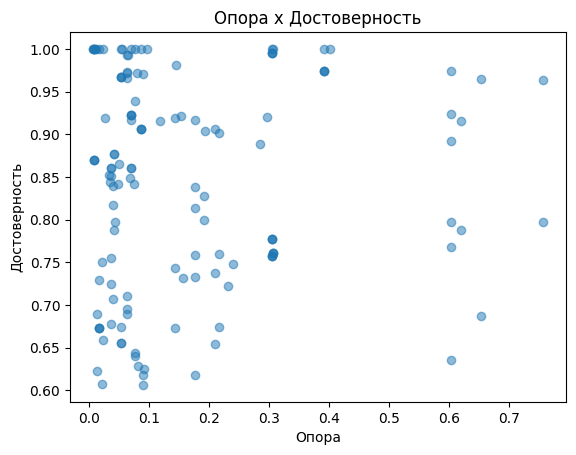

In [ ]:
#Опора x Достоверность
plt.scatter(rules_list['support'], rules_list['confidence'], alpha=0.5)
plt.xlabel('Опора')
plt.ylabel('Достоверность')
plt.title('Опора x Достоверность')
plt.show()

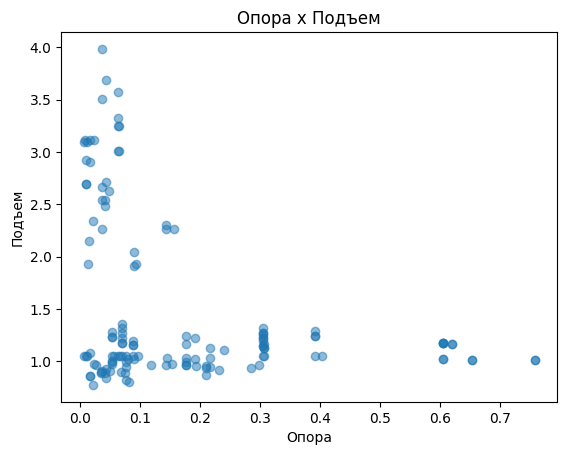

In [ ]:
#Опора х Подъем
plt.scatter(rules_list['support'], rules_list['lift'], alpha=0.5)
plt.xlabel('Опора')
plt.ylabel('Подъем')
plt.title('Опора x Подъем')
plt.show()

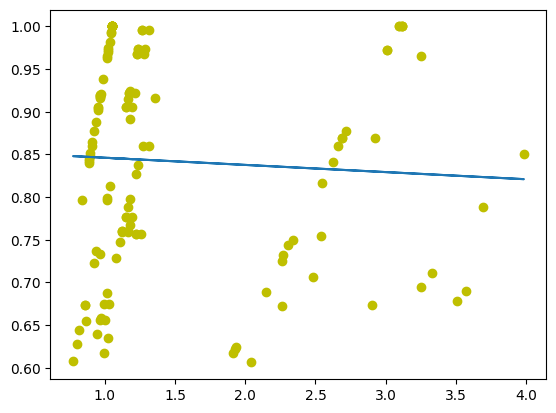

In [ ]:
#Подъем х Достоверность (между этими двумя параметрами можно также вычислять корреляцию и строить регрессию как уравнение взаимосвязи)
fit = np.polyfit(rules_list['lift'], rules_list['confidence'], 1)
fit_lm = np.poly1d(fit)
plt.plot(rules_list['lift'], rules_list['confidence'], 'yo', rules_list['lift'], fit_lm(rules_list['lift']))
plt.show()

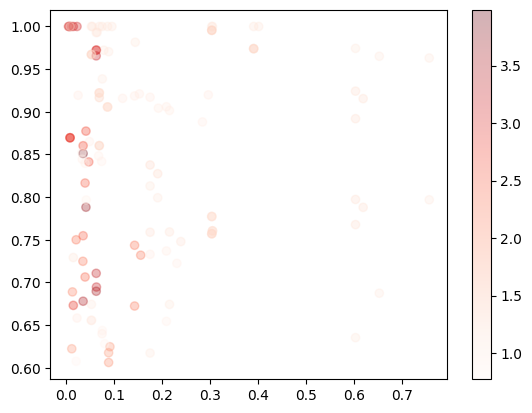

In [ ]:
#Мы уже строили уровневую диаграмму рассеяния в предыдущей лабораторной работе. В данном случае построим ее с осями:
#Х - опора
#У - достоверность
#Z - подъем

x = rules_list.support
y = rules_list.confidence
colors = rules_list.lift
plt.scatter(x, y, c=colors, alpha=0.3, cmap='Reds')
plt.colorbar()
plt.show()

На основе точечных диаграмм можно сделать следующие выводы:
Опора (Support) против Достоверности (Confidence):
    Диаграмма показывает взаимосвязь между опорой и достоверностью ассоциативных правил.
    Более высокие значения опоры указывают на то, что правило применимо к большей доле транзакций.
    Более высокие значения достоверности указывают на более сильную связь между предшественником и последующим событием.
    Диаграмма может помочь выявить правила с высокой опорой и достоверностью, которые считаются более надежными и значимыми.

Опора (Support) против Подъема (Lift):
    Диаграмма показывает взаимосвязь между опорой и показателем подъема ассоциативных правил.
    Более высокие значения подъема указывают на более сильную связь между предшественником и последующим событием с учетом ожидаемой частоты последующего события.
    Диаграмма может помочь выявить правила с высокой опорой и подъемом, что указывает на значимые связи, не обусловленные случайностью.

Подъем (Lift) против Достоверности (Confidence):
    Диаграмма показывает взаимосвязь между показателем подъема и достоверностью ассоциативных правил.
    Она позволяет оценить корреляцию и, возможно, построить уравнение регрессии для описания связи между этими двумя параметрами.
    Положительная корреляция между подъемом и достоверностью указывает на то, что при увеличении достоверности также обычно увеличивается подъем.

Опора (Support) против Достоверности (Confidence) против Подъема (Lift):
    Эта диаграмма рассеяния включает три измерения: опору, достоверность и подъем.
    Ось x представляет опору, ось y - достоверность, а цвет - подъем.
    Она предоставляет комплексное представление правил, учитывая их опору, достоверность и подъем одновременно.
    Вариация цвета помогает выявить правила с высокими значениями подъема.

Что касается уровня опоры для правил с высоким подъемом, мы можем наблюдать по четвертой точечной диаграмме:
Правила с высоким подъемом (обозначенные более темными цветами) обычно имеют различные уровни опоры.
Некоторые правила с высоким подъемом имеют низкую опору, что указывает на то, что они применимы к небольшому количеству транзакций, но имеют сильную связь.
Другие правила с высоким подъемом имеют высокую опору, указывая на то, что они применимы к большей доле транзакций и все равно имеют сильную связь.
В заключение, точечные диаграммы предоставляют визуальные представления связей между опорой, достоверностью и подъемом в ассоциативных правилах и помогают выявить интересные закономерности и связи.